# Image Classification to Detect whether a Person is Wearing a Mask
#### ~Arnav Modi

The following program is created to look at images and tell whether the person in the image is wearing a mask or not. The model is able to detect whether a person is wearing a mask with an accuracy of 99% on the testing dataset. The dataset for this binary classification problem was taken from kaggle. This is the link for the dataset: [Face Mask ~ 12k Images Dataset](http://https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset). This model can be used in workplaces to check whether a person is wearing a mask, thus allowing a person to enter a building only if he/she is wearing a mask. The following are the components of this program:

* Importing libraries
* Loading the dataset from the kaggle directory
* Splitting the training data into separate numpy arrays of images and their labels
* Splitting the testing data into separate numpy arrays of images and their labels
* Defining the model
* Compiling the model
* Fitting the model
* Visualising the accuracy and loss during the training
* Evaluating the model on the testing dataset

## Importing all the required libraries

In [4]:
import numpy as np
import pandas as pd
import cv2    
from tqdm import tqdm
from PIL import Image
from keras.layers import Convolution2D, Activation,MaxPooling2D, Flatten, Dense, BatchNormalization, Input, ZeroPadding2D
from keras.models import Model

print("All the libraries have been imported...")

All the libraries have been imported...


# Loading the Dataset of 12,000 images

The output for the below cell has not been shown fully as it would take up 12,000 lines. Only the path of every 100th image has been shown. So, in reality, 100 times the images whose directories are shown have been loaded.

In [5]:
import os
num = 1
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if num % 100 == 0 and "Validation" not in dirname:
            print(os.path.join(dirname, filename))
        else:
            os.path.join(dirname, filename)
        num += 1

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/2904.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/4796.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1217.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/4780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/4597.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/Augmented_787_5812521.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/Augmented_125_3402457.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/Augmented_191_53771.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/Augmented_282_1324197.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5590.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutM

# Splitting the training data into x_train and y_train

The training data is the dataset on which the mask detection model would be trained. In the dataset used, there are 10,000 training examples. Both x_train and y_train are numpy arrays. By convention, in machine learning, x_train contains the training data and y_train contains the corresponding labels for that training data. In this program, x_train contains the images and y_train contains the labels for for those images (ie. with or without mask).

In [6]:
print("Loading the images in the training dataset...")
train_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/'
x_train = []
y_train = []
lst_show = []

for folder in os.listdir(train_dir):
    
    if folder == "WithoutMask":
        val = 0
    else:
        val = 1
    
    for file_name in tqdm(os.listdir(os.path.join(train_dir, folder))):
        
        folder_path = os.path.join(train_dir, folder)
        
        image_path = os.path.join(folder_path, file_name)
        
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (64, 64))
        final_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        
        x_train.append(final_image)
        y_train.append(val)
        
x_train = np.array(x_train, dtype = "float32")
y_train = np.array(y_train, dtype = "int32")

  0%|          | 7/5000 [00:00<01:13, 67.71it/s]

Loading the images in the training dataset...


100%|██████████| 5000/5000 [01:07<00:00, 73.89it/s]


# Checking if the training data has been loaded properly into x_train and y_train

In [7]:
x_train_shape = x_train.shape

print("Number of images in the training dataset =", x_train_shape[0])
print("Size of images in the training dataset = ", x_train_shape[1], "x", x_train_shape[2])
print("Number of channels in the image =", x_train_shape[3], "(RGB image)")
print()
y_train_shape = y_train.shape
print("Number of labels corresponding to the images =", y_train_shape[0])

Number of images in the training dataset = 10000
Size of images in the training dataset =  64 x 64
Number of channels in the image = 3 (RGB image)

Number of labels corresponding to the images = 10000


# Splitting the testing data into x_test and y_test

The testing data is the dataset on which the accuracy of the mask detection model would be evaluated. In the dataset used, there are roughly 1,000 testing examples. Both x_test and y_test are numpy arrays. By convention, in machine learning, x_test contains the testing data and y_test contains the corresponding labels for that testing data. In this program, x_test contains the images and y_test contains the labels for for images (ie. with or without mask).

In [8]:
print("Loading the images in the test dataset...")
test_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/'
x_test = []
y_test = []

for folder in os.listdir(test_dir):
    
    if folder == "WithoutMask":
        val = 0
    else:
        val = 1
    
    for file_name in tqdm(os.listdir(os.path.join(test_dir, folder))):
        
        folder_path = os.path.join(test_dir, folder)
        
        image_path = os.path.join(folder_path, file_name)
        
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (64, 64))
        final_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
            
        x_test.append(final_image)
        y_test.append(val)
        
x_test = np.array(x_test, dtype = "float32")
y_test = np.array(y_test, dtype = "int32")

  2%|▏         | 8/509 [00:00<00:06, 78.91it/s]

Loading the images in the test dataset...


100%|██████████| 483/483 [00:06<00:00, 75.57it/s]


# Checking if the training data has been loaded properly into x_test and y_test

In [9]:
x_test_shape = x_test.shape

print("Number of images in the testing dataset =", x_test_shape[0])
print("Size of images in the testing dataset = ", x_train_shape[1], "x", x_test_shape[2])
print("Number of channels in the image =", x_test_shape[3], "(RGB image)")
print()

y_test_shape = y_test.shape

print("Number of labels corresponding to the images =", y_test_shape[0])

Number of images in the testing dataset = 992
Size of images in the testing dataset =  64 x 64
Number of channels in the image = 3 (RGB image)

Number of labels corresponding to the images = 992


# This function has been defined to create the model on which the dataset will be trained

## Steps which have been followed to create the convolutional neural network:
* Padding
* Convolution
* Batch Normalization
* relu Activation
* MaxPooling
* Flatten
* Dense
* Model

### Padding the Image
The main reason behind the padding of an image is to ensure that the features of the pixels which are present at the boundary of the image do not get disregarded when convolution is performed in the next step.


### Performing one round of convolution
A convolutional filter is applied over the image. Generally, as in this program, convolution shrinks the size of the image and increases the number of channels. The filter passes over the image according to the specified stride (jump value) and in the end produces a weighted sum over each of its position on the main image. 

### Applying Batch Normalization
Batch normalisation allows networks to the trained very quickly.


### Applying the relu non-linearity
The main role of the relu activation is to detect features from the filtered image produced as a result of applying convolution.

### Applying MaxPooling
Maxpooling is used in order to condense the image so that the features which were detected by applying the activation function can be enhanced.

### Applying Flatten
The main reason for its use is to convert the 3-dimensional array into a 1-dimensional vector without losing important features which whre detected by the relu activation.

### Applying Dense
Dense is used to create the final fully connected layer.

### Model
Combines the layers above to create a model. This model is used later on to view the summary of the model, train the data, and to evaluate the accuracy of the testing data.

In [44]:
def FaceMaskModel(shape):
    
    X_input = Input(shape)
    
    padding_dimensions = (2, 2)
    X = ZeroPadding2D(padding_dimensions)(X_input)
    
    layers = 32
    filter_size = (8, 8)
    strides = (1, 1)
    
    X = Convolution2D(layers, filter_size, strides = strides, name = "Convolution")(X)
    X = BatchNormalization(axis = 1, name = "Batch_Normalization")(X)
    X = Activation("relu")(X)
    
    X = MaxPooling2D((3, 3), name = "Max_pooling")(X)
    
    X = Flatten()(X)
    X = Dense(1, activation = "sigmoid", name = "fully_connected_layer")(X)
    
    face_mask_model = Model(inputs = X_input, outputs = X, name = "Face_Mask_Classifier")
    
    return face_mask_model

# The function FaceMaskModel (which is defined above) has been called on the training images

In [45]:
face_mask_model = FaceMaskModel(x_train.shape[1:])

# Summary of the FaceMaskModel

In [46]:
face_mask_model.summary()

Model: "Face_Mask_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 68, 68, 3)         0         
_________________________________________________________________
Convolution (Conv2D)         (None, 61, 61, 32)        6176      
_________________________________________________________________
Batch_Normalization (BatchNo (None, 61, 61, 32)        244       
_________________________________________________________________
activation_8 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
Max_pooling (MaxPooling2D)   (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12800)    

# Compiling the model

The adam optimizer is used with a loss function called binary crossentropy as this is a binary classification problem (ie. we only have to classifiy images as with mask and without mask). Various metrics can be used whose values will be displayed while the data is being trained. Here only the accuracy metric has been used

In [47]:
face_mask_model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

# The function "fit" is  used to train the data on the FaceMaskModel

In [48]:
history = face_mask_model.fit(x = x_train,y = y_train, epochs = 32 ,batch_size = 10)

Epoch 1/32
1000/1000 [==============================] - 54s 54ms/step - loss: 0.1532 - accuracy: 0.9419
Epoch 2/32
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0793 - accuracy: 0.9712
Epoch 3/32
1000/1000 [==============================] - 50s 50ms/step - loss: 0.0616 - accuracy: 0.9795
Epoch 4/32
1000/1000 [==============================] - 50s 50ms/step - loss: 0.0478 - accuracy: 0.9830
Epoch 5/32
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0402 - accuracy: 0.9855
Epoch 6/32
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0341 - accuracy: 0.9885
Epoch 7/32
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0317 - accuracy: 0.9879
Epoch 8/32
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0326 - accuracy: 0.9876
Epoch 9/32
1000/1000 [==============================] - 53s 53ms/step - loss: 0.0290 - accuracy: 0.9897
Epoch 10/32
1000/1000 [==============================] - 52s 52m

# Visualising the loss during training at the end of each successive epoch

As a general trend, the loss should decrease with successive epochs...


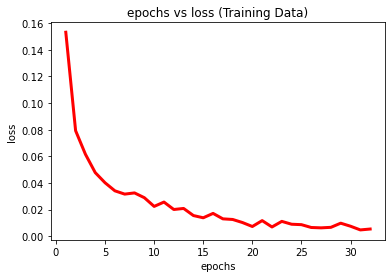

In [63]:
import matplotlib.pyplot as plt

print("As a general trend, the loss should decrease with successive epochs...")

epochs = [i for i in range(1, 33)]

loss = [history.history['loss']]

plt.plot(epochs, loss[0], color = "red",linewidth = 3)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs vs loss (Training Data)")

plt.show()

# Visualising the accuracy during training at the end of each successive epoch

As a general trend, the accuracy should increase with successive epochs...


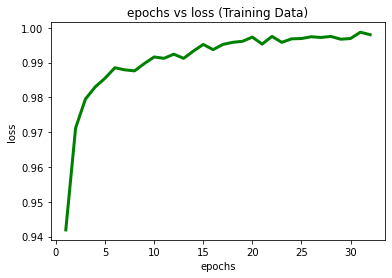

In [64]:
print("As a general trend, the accuracy should increase with successive epochs...")

epochs = [i for i in range(1, 33)]

accuracy = [history.history['accuracy']]

plt.plot(epochs, accuracy[0], color = "green",linewidth = 3)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs vs loss (Training Data)")
plt.show()

# Testing the accuracy of the model on the test dataset. 
This will indicate the true accuracy of the model. This is because the model is now making predictions for a dataset of images it has not been trained on (ie. the model has not come across these images previously)

In [70]:
loss, acc = face_mask_model.evaluate(x = x_test,y = y_test)
print()
print ("Loss =" , round(loss, 3))
print ("Test Accuracy =" , round(acc*100, 3), "%")

31/31 [==============================] - 1s 42ms/step - loss: 0.0352 - accuracy: 0.9909

Loss = 0.035
Test Accuracy = 99.093 %
